Итак, приступим к выполнению задачи. В качестве анализируемых данных вам доступнен датасет с симуляцией распадов тяжелых $B_c^+$ мезонов. Симуляция была получена с использованием функции плотности вероятности реального расспределения из данных эксперимента на БАК.

В задании вам будет необходимо выполнить несколько шагов для получения ответа.
Для каждой подзадачи будут даны фрагменты кода, которые вам необходимо будет дополнить + краткое описание в текстовых ячейках. Основная задача заключается в оценке числа сигнальных распадов исследуемой частицы.



Сперва загрузим подготовленный датасет

In [1]:
#Загружам файл с Google drive
!gdown 1H-S-QobJjAYlWo_i9jJ01F2A7oizgRdi

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Импортируем библиотеки, необходимые для работы



In [2]:
#Импортируем библиотеки

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Читаем данные и выполняем первую подзадачу - оцениваем диапазон, в котором распределены события

In [27]:
# Загрузка данных из CSV-файла
data = pd.read_csv('C:\IDE\Statistic\data\Bc_data.csv')
mass_data = data['mass'].values

#Оцените интервал, в котором распределены события. Используйте значения, округленные до 2х знаков после запятой
mass_data = np.round(mass_data,2)


In [65]:
data.shape

(14913, 1)

In [34]:
min_value = min(mass_data)
max_value = max(mass_data)
print(min_value)
print(max_value)

6.15
6.45


In [132]:
n = len(mass_data)
k = int(1 + 3.322 * np.log10(n))
k

14

In [57]:
mass_data
mean = np.mean(mass_data)          # Среднее значение
std_dev = np.std(mass_data)        # Стандартное отклонение
variance = np.var(mass_data)       # Дисперсия
percentile_25 = np.percentile(mass_data, 25) # 25-й перцентиль (Q1)
percentile_75 = np.percentile(mass_data, 75) # 75-й перцентиль (Q3)
print(f"Среднее: {np.round(mean,2)}")
print(f"Стандартное отклонение: {np.round(std_dev,2)}")
print(f"Межквартильный размах (IQR): {np.round(percentile_75 - percentile_25,2)}")

Среднее: 6.28
Стандартное отклонение: 0.07
Межквартильный размах (IQR): 0.06


Определим остальные параметры гистограммы. Здесь вам предстоит определить:


*   Какое количество бинов должно быть в определенном ранее интервале, если ширина бина равна $0.005~ГэВ/c^2$ ($ГэВ/c^2$ - это мера массы реконструированных частиц)
*   Построить распределение с определенными характеристиками: диапазон, число бинов и их ширина

C:\Users\troyd\AppData\Local\Temp\ipykernel_6132\3452275932.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


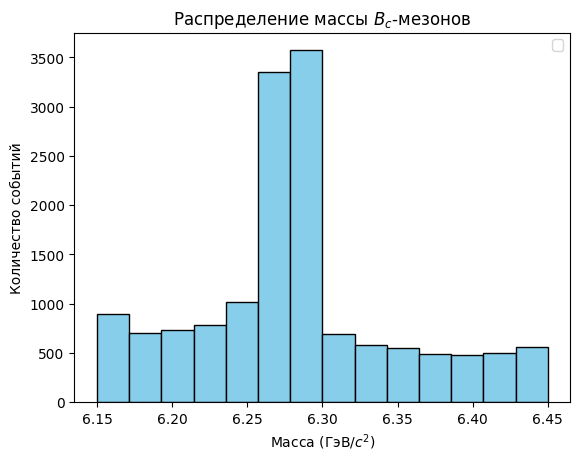

In [163]:
#Определяем параметры гистограммы (значения в столбцах гистограммы и их края)
counts, bin_edges = np.histogram(mass_data, bins=18)#, range=(6, 6)) #Вместо многоточий введите ваши значения

#Вычислям центры каждого бина
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

#Вычисляем их ширину (должна совпалать со значением из условия задачи)
bin_width = round(bin_edges[1] - bin_edges[0], 3)

# Нарисуйте гистограмму, с вышеуказанными параметрами
plt.hist(mass_data, bins=14, color='skyblue', edgecolor='black')
#Ваш код здесь

# Для удобства визуализации
plt.xlabel('Масса (ГэВ/$c^2$)')
plt.ylabel('Количество событий')
plt.title('Распределение массы $B_c$-мезонов')
plt.legend()
plt.show()


In [164]:
counts

array([ 522,  721,  358,  737,  783,  457, 1753, 4251, 1485,  382,  582,
        586,  267,  492,  242,  488,  474,  333])

In [165]:
bin_width

np.float64(0.017)

In [84]:
bin_centers

array([6.1525, 6.1575, 6.1625, 6.1675, 6.1725, 6.1775, 6.1825, 6.1875,
       6.1925, 6.1975, 6.2025, 6.2075, 6.2125, 6.2175, 6.2225, 6.2275,
       6.2325, 6.2375, 6.2425, 6.2475, 6.2525, 6.2575, 6.2625, 6.2675,
       6.2725, 6.2775, 6.2825, 6.2875, 6.2925, 6.2975, 6.3025, 6.3075,
       6.3125, 6.3175, 6.3225, 6.3275, 6.3325, 6.3375, 6.3425, 6.3475,
       6.3525, 6.3575, 6.3625, 6.3675, 6.3725, 6.3775, 6.3825, 6.3875,
       6.3925, 6.3975, 6.4025, 6.4075, 6.4125, 6.4175, 6.4225, 6.4275,
       6.4325, 6.4375, 6.4425, 6.4475])

In [76]:
counts

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,  522,  721,
        358,  737,  783,  457, 1753, 4251, 1049,  818,  582,  303,  550,
        492,  242,  488,  474,  224,  109,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

Далее нам нужно определить модель аппроксимации. Если у вас все получилось в прошлой ячейке и вы видите форму спектра, то из визуального анализа видно, что данные представляют собой пик - ваш сигнал и плоскую положку из фона.
В слелующей ячейке вам необходимо реализовать функцию аппроксимации ваших данных. Сигнал предлагаем описывать функцией Гаусса, а фон - полиномом первого порядка $ax + b$

In [115]:
def model(x, N_sig, N_bkg, mu, sigma, a, b):
    # Сигнальная часть: нормированный Гаусс
    signal = N_sig * (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2)) # Ваш код здесь (реализуйте функцию Гаусса)

    # Фоновая часть: линейная зависимость с свободным членом
    background = N_bkg * (a * x + b) # Ваш код здесь (реализуйте полином первого порядка)

    # Общая модель с поправкой на ширину бина
    return (signal + background) * bin_width

In [ ]:
model(bin_centers, N_sig, N_bkg, mu, bin_width, a, b)

Дальше важно определить начальные значения наших параматров и их границы.
Давайте подумаем, как это сделать?

Начнем с среднего значения $\mu$. Мы знаем, что данные представляют собой распады частицы, которая называется $B_c^+$ и наши данные представляют массы реконструированных частиц. Очевидно, что среднее - есть некоторое известное, табличное значение. Поэтому обратимся за помощью к онлайн [справочнику](https://pdglive.lbl.gov/Particle.action?init=0&node=S091&home=MXXX049) свойст элементарных частиц. Воспользуемся самым актуальным измерением (не забудьте разделить число из таблицы на 1000, чтобы перевести МэВ в ГэВ). В качестве минимального и максимального значения среднего можно взять интервал $\pm 3\sigma$, где $\sigma$ - погрешность измерения массы

Далее - среднеквадратичное отклонение. Тут без подсказок, вспомните материалы Урока №3, а именно величину FWHM и ее связь со среднеквадратичным отклонением. FWHM можете оценить на глаз из гистограммы данных. Также очевидно, что $\sigma$ не может быть меньше 0. В качестве максимального значения возьмите начальное значение, умноженное на 2.

Следующий параметр - число сигнальных событий $N_{sig}$. Амплитуда распределения Гаусса в нашем случае дается выражением: $A = \frac{N_{sig}\cdot w_{bin}}{\sqrt{2\pi}\sigma}$, где $w_{bin}$ - поправка на ширину бина. Отсюда легко выразить приблизительное значение для $N_{sig}$. Что касается границ - сигнал не может быть меньше 0. Максимальное значение пусть будем начальным значением, умноженным на 2.

И, наконец, число фоновых событий. Пусть это будет разность между размером нашей выборки и $N_{sig}$. Минимальное и максимальное значение параметра - аналогично, как было сделано для сигнала.

Параметры фона оставим как есть в шаблоне.

In [67]:
1225*2

2450

In [126]:
14913-2450

12463

In [127]:

#Начальные приближения параметров и их границы

#N_bkg = len(data) - ..... #Вместо многоточия укажите вашу оценку для N_sig
params_dict = {
    "N_sig":
      {"value": 12463.0, "min": 0.0, "max": 25000.0},    #Укажите вместо XXX требуемые значения
    "N_bkg":
      {"value": 2450.0, "min": 0.0, "max": 4900.0},    #Укажите вместо XXX требуемые значения
    "mu":
      {"value": 6.27447, "min": 6.27351, "max": 6.27543},    #Укажите вместо XXX требуемые значения
    "sigma":
      {"value": 0.011, "min": 0.0, "max": 0.022},    #Укажите вместо XXX требуемые значения
    "a":
      {"value": -8, "min": -10, "max": -4},
    "b":
      {"value": 60, "min": 50, "max": 80},
}


p0 = [params_dict[param]["value"] for param in params_dict]
bounds = (
    [params_dict[param]["min"] for param in params_dict],
    [params_dict[param]["max"] for param in params_dict]
)


# Аппроксимируем
params, _ = curve_fit(model, bin_centers, counts, p0=p0, bounds = bounds,  maxfev=5000)

# Оценки параметров
N_sig_fit, N_bkg_fit, mu_fit, sigma_fit, a_fit, b_fit = params


Раз вы добрались до сюда, то давайте наконец то построим результат с посмотрим, насколько хорошо наша модель описывает данные!

In [ ]:
'''range=(......., .......),'''

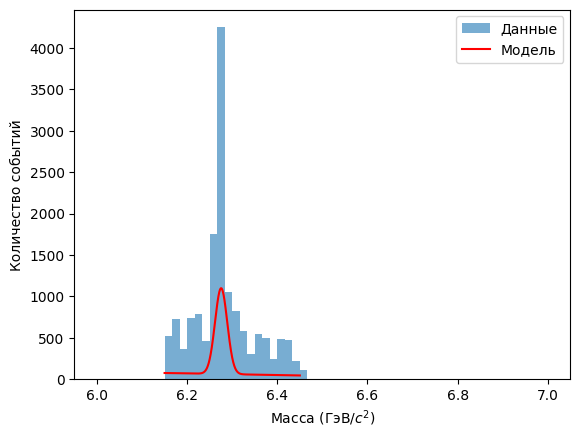

In [130]:
# Построение данных и фита
plt.hist(mass_data, bins= 200 , range=(6, 7), alpha=0.6, label='Данные') # Вместо многоточий укажите число бинов и диапазон

#Создаем массив значений для нашей модели
x_fit = np.linspace(6.15, 6.45, 15000)

#Рисуем модель
plt.plot(x_fit, model(x_fit, *params), 'r-', label='Модель')

#Для удобсва визуализации
plt.xlabel('Масса (ГэВ/$c^2$)')
plt.ylabel('Количество событий')
plt.legend()
plt.show()

Распечатаем оценки параметров функции Гаусса

In [129]:
print(f"Сигнальные события: {N_sig_fit:.0f}  ")
print(f"Фоновые события:  {N_bkg_fit:.0f}  ")
print(f"Оценка μ (масса пика): {mu_fit:.3f}  ГэВ/$c^2$")
print(f"Оценка σ (ширина): {sigma_fit:.3f}  ГэВ/$c^2$")

Сигнальные события: 7034  
Фоновые события:  2383  
Оценка μ (масса пика): 6.275  ГэВ/$c^2$
Оценка σ (ширина): 0.014  ГэВ/$c^2$


In [ ]:
print(f"Сигнальные события: {N_sig_fit:.0f}  ")
print(f"Фоновые события:  {N_bkg_fit:.0f}  ")
print(f"Оценка μ (масса пика): {mu_fit:.3f}  ГэВ/$c^2$")
print(f"Оценка σ (ширина): {sigma_fit:.3f}  ГэВ/$c^2$")

Сигнальные события: 5521  
Фоновые события:  7294  
Оценка μ (масса пика): 6.274  ГэВ/$c^2$
Оценка σ (ширина): 0.011  ГэВ/$c^2$


Поздравляем, если полученное вами число совпало с эталонным ответом на платформе! Конечно, выполняемая оценка сделана крайне грубо ввиду многих особенностей. Как с точки зрения статистики, так и с точки зрения физических особенностей изучаемого процесса. Но, надеюсь, решить данную задачу вам было интересно, а главное полезно для понимания изученной темы.